In [1]:
import numpy as np
import cv2
from pylab import imread
from skimage.color import rgb2gray
from matplotlib import pyplot as plt 
from scipy.linalg import svd
from scipy.linalg import toeplitz
import pandas as pd

c:\Users\PC\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


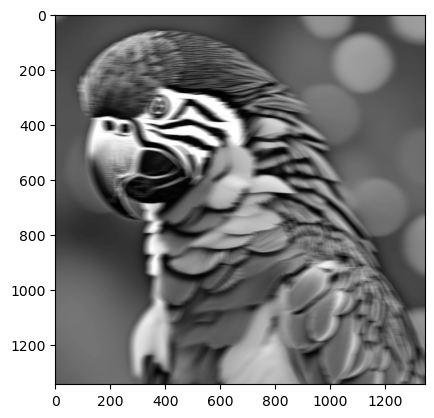

In [2]:
# đọc ảnh
image=imread('parrot_horizontal_gray _official.jpg')
plt.imshow(image, cmap='gray')

In [4]:
# biến hình ảnh thành dạng mảng
B = np.array(image)


In [28]:
# Tạo ma trận Toeplitz
def create_toeplitz(matrix, l):
    padding = np.zeros(matrix.shape[1]-1, matrix.dtype)
    first_col = np.r_[matrix[0, 0], padding]
    first_row = np.r_[matrix[0,0:l], padding]
    toeplitz_matrix = toeplitz(first_col, first_row).astype('float64')
    # Tạo ma trận giảm cấp m x n từ l :
    for i in range(toeplitz_matrix.shape[0]):
        for j in range(toeplitz_matrix.shape[1]):
            if toeplitz_matrix[i, j] != 0:
                toeplitz_matrix[i, j] = 1/l
    return toeplitz_matrix

A = create_toeplitz(B, 30)
print("toeplitz matrix is:\n", A)
                
print(A.shape)


toeplitz matrix is:
 [[0.03333333 0.03333333 0.03333333 ... 0.         0.         0.        ]
 [0.         0.03333333 0.03333333 ... 0.         0.         0.        ]
 [0.         0.         0.03333333 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.03333333 0.         0.        ]
 [0.         0.         0.         ... 0.03333333 0.03333333 0.        ]
 [0.         0.         0.         ... 0.03333333 0.03333333 0.03333333]]
(1344, 1373)


In [29]:
# Tìm SVD
m, n = A.shape
U, S_diag, V_T = svd(A)
# Tìm ma trận Sigma_+
k = len(S_diag)
Sigma = np.zeros((k, k))
np.fill_diagonal(Sigma, S_diag)

if m > k:
    Sigma = np.pad(Sigma, pad_width = ((0, m-k), (0, 0)), mode='constant', constant_values=0)
if n > k:
    Sigma = np.pad(Sigma, pad_width = ((0, 0), (0, n-k)), mode='constant', constant_values=0)

# Tính A_pinv
Sigma_pinv = np.linalg.pinv(Sigma)
V = V_T.T
U_T = U.T
A_pinv = np.dot(V, np.dot(Sigma_pinv, U_T))
# Tính X_pinv
X_pinv = np.dot(B, A_pinv.T)


print("Ma trận Sigma_+ là:\n", Sigma_pinv)
print("Ma trận của ảnh sau khi khôi phục là:\n", X_pinv)



Ma trận Sigma_+ là:
 [[1.0002006  0.         0.         ... 0.         0.         0.        ]
 [0.         1.00080274 0.         ... 0.         0.         0.        ]
 [0.         0.         1.00180744 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(1373, 1344)
Ma trận của ảnh sau khi khôi phục là:
 [[133.98929864 154.85886386  94.85886386 ... 103.98929864 182.90234212
  172.46755951]
 [124.88097145 154.88097145 135.31575406 ... 103.35923232 183.57662363
  172.4896671 ]
 [130.76207106 150.32728846 155.54467976 ... 104.02294063 205.10989715
  154.89250585]
 ...
 [142.23831342  62.67309602  99.84700907 ...  97.89048733  77.67309602
  144.84700907]
 [131.90493736 130.60058954 114.94841562 ... 105.16580693   4.73102432
  186.68754606]
 [119.62032617 104.62032617  81.79423921 ..

Text(0.5, 1.0, 'Ảnh nhòe theo phương ngang')

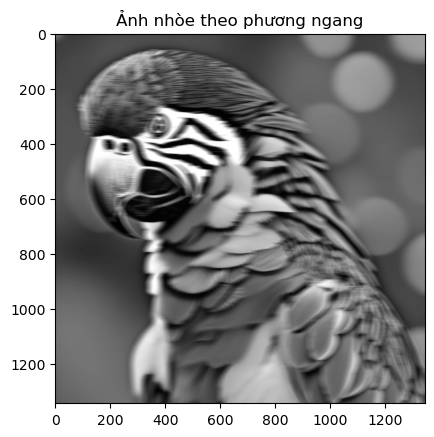

In [26]:
# In ra ảnh nhòe
plt.imshow(image, cmap='gray')
plt.title('Ảnh nhòe theo phương ngang')

Text(0.5, 1.0, 'Ảnh sau khi khôi phục')

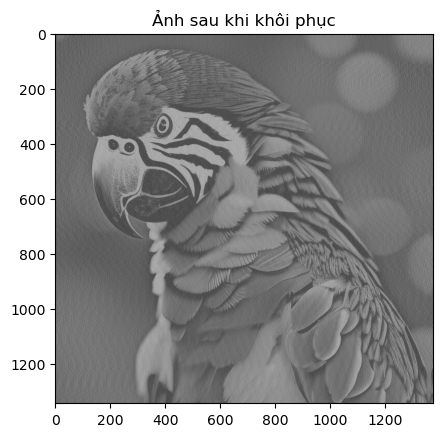

In [27]:
# In ra ảnh sau khi khôi phục
plt.imshow(X_pinv, cmap='gray')
plt.title('Ảnh sau khi khôi phục')